In [ ]:
# imports
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import colormaps as cmaps # for scientific colourmaps

* Plots growth rate per cost (x-axis) against iteration for each candidate medium
* Each dot is colour-coded according to the iteration it resulted from.
* Plots a line along the best growth-cost trade-off found until a given iteration
* Saves the figure as Figure2A.png

In [4]:
data = pd.read_csv("Figure2A.csv")

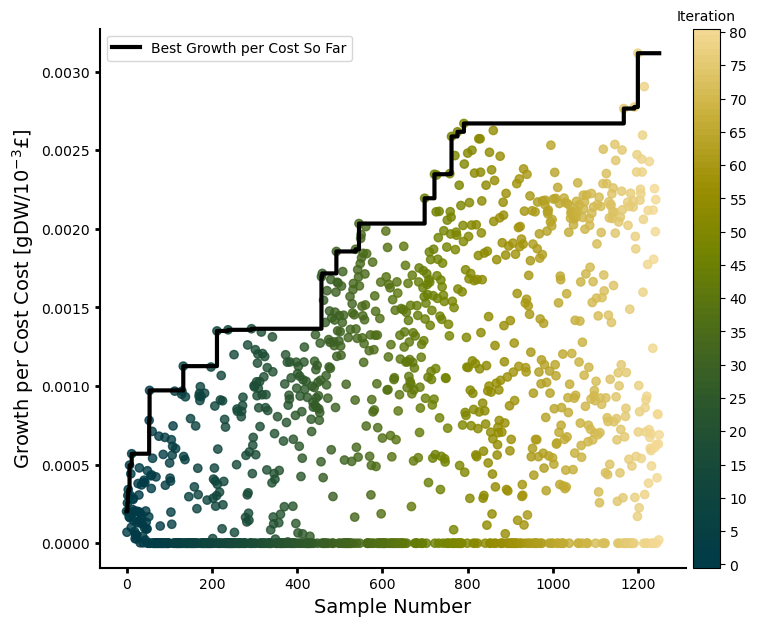

In [9]:
# Create the plot with given size
fig, axes = plt.subplots(1, 1, figsize = (9, 7))

# Define colour mapping - 1 for random initial points, 1 each per batch (n_iter)
n_start = data["n_start"][0]
n_batch = data["n_batch"][0]
n_candidates = data["n_candidates"][0]

 # Generate distinct colours
colours = cmaps.bamako.cut(0.05, "right")(np.linspace(0, 1, n_batch + 1))
# Create a custom colourmap for the colour bar
cmap = mcolors.ListedColormap(colours)

# Create an array to store colours for each data point
point_colours = np.zeros(len(data), dtype = object)

# Assign first n_start points the same colour
point_colours[:n_start] = [colours[0]] * n_start
# Assign different colours to each batch
for i in range(n_batch):
    start_idx = n_start + i * n_candidates
    end_idx = start_idx + n_candidates
    point_colours[start_idx:end_idx] = [colours[i + 1]] * (end_idx - start_idx) # Assign a new color per batch

# Set boundaries between each batch, from -0.5 to n_batch + 0.5
boundaries = np.arange(n_batch + 2) - 0.5
norm = mcolors.BoundaryNorm(boundaries, cmap.N)

 # Scatter plot with custom colours, applying transparence (alpha = 0.8)
sc = axes.scatter(x = data.index, y = data["growth_cost"], c = point_colours, alpha = 0.8)


# draw a line along the best so far result (growth/cost)
best_so_far = -np.inf
best_values = []
for val in data["growth_cost"]:
    if val > best_so_far:
        best_so_far = val
    best_values.append(best_so_far)
axes.step(
    data.index, best_values, where = "post", color = "black", linestyle = "-",
    linewidth = 3, label = "Best Growth per Cost So Far")


# axes
axes.set_xlabel("Sample Number", fontsize = 14)
axes.set_ylabel("Growth per Cost Cost [gDW/$10^{-3}£$]", fontsize = 14)
axes.xaxis.set_tick_params(width = 2, labelsize = 10)
axes.yaxis.set_tick_params(width = 2, labelsize = 10)
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.spines["bottom"].set_linewidth(1.5)
axes.spines["left"].set_linewidth(1.5)

# Add the color bar
tick_positions = np.arange(0, n_batch + 1, 5)
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = fig.colorbar(sm, ax = axes, ticks = tick_positions, pad = 0.01) # pad defines distance
cbar.ax.set_title("Iteration", fontsize = 10)
cbar.ax.tick_params(which = "minor", size = 0) # turn off minor ticks at colour boundaries

# Display the legend
axes.legend()
    
# Show the plot
plt.show()

fig.set_size_inches(9, 7)  # Consistent physical size in inches
fig.savefig("Figure2A.png", dpi = 300, bbox_inches = None)